<a href="https://colab.research.google.com/github/ObLun27/Estadistica/blob/main/Unidad1/Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


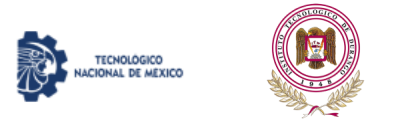




#Probabilidad y Estadistica
##Unidad 1
Practica: 6

Estadistica descriptiva Dataset Autos

Alumno: Obed Alejandro Luna Garcia

Grupo: 2YY

Profesor: José Gabriel Rodríguez Rivas

#Primera Parte
##Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencial central

In [40]:
from statistics import *
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot

In [41]:
autos = pd.read_csv('autos2.csv', encoding='ISO-8859-1')
#Este comando es para quitar los elementos NA en la columna de precios
#Puede ser util para calcular mejor la media y la desviacion estandar
precios = autos['price'].dropna()

In [42]:
#Determinar el valor mínimo de precios
autos.price.min()

5118.0

In [43]:
#Determinar el valor máximo de precios
autos.price.max()

45400.0

In [44]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [45]:
#Determinar valor de la moda
moda = mode(autos.price)
print("La moda es:", moda)

La moda es: 16500.0


In [46]:
#Determinar el valor de la media de precios
#Se suman todos los precios sin contar los NA y se divide entre la cantidad total
#de la columna price
media = sum(precios) / len(autos.price)
print("La media es:", media)

La media es: 12949.429268292683


In [47]:
#Determinar el valor de la mediana de los precios
mediana = median(autos.price)
print("La mediana es:", mediana)

La mediana es: 18150.0


In [48]:
#Calcular la desviacion estandar
desvEstandar = autos.price.std()
print("La desviacion estandar es", desvEstandar)

La desviacion estandar es 7947.066341939271


In [49]:
#Determinar la estadistica y los cuartiles de los precios con describe()
print("Estadistica y cuartiles de los precios")
autos.price.describe()

Estadistica y cuartiles de los precios


,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


#Segunda Parte
##Realizar un Histograma de precios de los autos

In [50]:
#Determinar mediante la regla de sturges la cantidad optima de bins o separadores
#Poner títulos y encabezados apropiados
#Interprete los datos y proporcione sus conclusiones
import math
print(autos.price)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [51]:
#Creacion de DataFrame
df = pd.DataFrame({'Precio':autos.price})
df

,Precio
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [52]:
#Numero de intervalos con la regla de sturges
n = len(autos.price)
K = int(1 + math.log2(n))
print("Valor de n:", n, "\nNúmero de Intervalos =", K)

Valor de n: 205 
Número de Intervalos = 8


In [53]:
#Crear tabla de frecuencias
tabla_frecuencias = pd.cut( df['Precio'], bins=K, include_lowest=True).value_counts().reset_index()
tabla_frecuencias.columns = ['Clase', 'Frec']
tabla_frecuencias

,Clase,Frec
0,"(5077.717, 10153.25]",98
1,"(10153.25, 15188.5]",42
2,"(15188.5, 20223.75]",36
3,"(20223.75, 25259.0]",8
4,"(30294.25, 35329.5]",7
5,"(35329.5, 40364.75]",4
6,"(25259.0, 30294.25]",3
7,"(40364.75, 45400.0]",3


Text(0, 0.5, 'Cantidad de Autos')

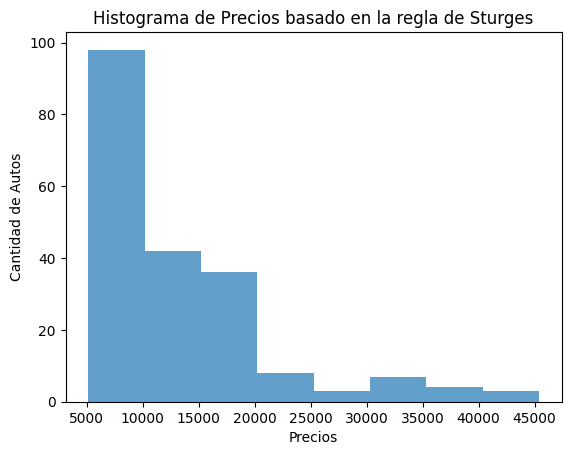

In [54]:
import matplotlib.pyplot as plt
plt.hist(df['Precio'], bins=K, alpha=0.7)
plt.title('Histograma de Precios basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Cantidad de Autos')

#Conclusiones en base al Histograma
Se puede apreciar como la mayoria de precios rondan entre los 5,000 y los 20,000 dólares, siendo entre 5,000 y 10,000 dólares los precios con mayor frecuencia (aproximadamente 100 autos), despues, alrededor de 40 autos rondan los precios de 10,000 y 15,000 dólares y por último aproximadamente 35 autos que están entre los 15,000 y 20,000 dólares.

#Diagrama de Caja y Bigotes

##Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)

Text(0, 0.5, 'Precio')

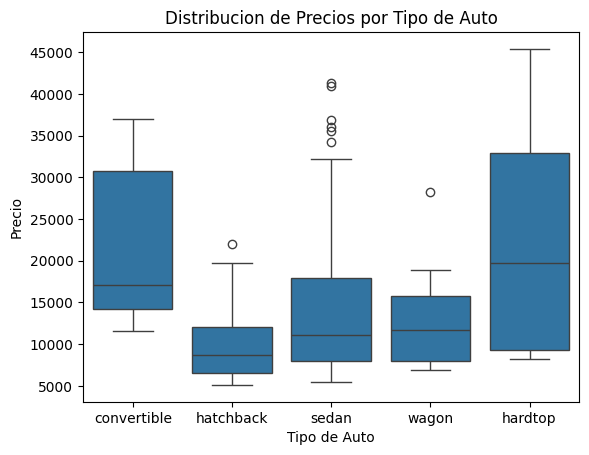

In [55]:
#Diagrama de cajas y bigotes en relacion al precio del auto y su tipo
sns.boxplot(x='body-style', y='price', data=autos)
plt.title("Distribucion de Precios por Tipo de Auto")
plt.xlabel("Tipo de Auto")
plt.ylabel("Precio")

##Conclusiones
Se aprecia como los convertibles y los tipos hardtrop son los Autos con precios mas elevados, aunque los hardtrop tienen un rango más amplio en sus precios, su media está por encima de la mayoria de otros precios. Podemos apreciar también como los hatchback tienen precios más bajos y con un rango más pequeño, por último los sedan y los wagon se encuentran en un rango intermedio de precios, a pesar de que los Sedan poseen algunos datos atípicos muy altos. En resumen, los Convertible y los Hardtop son vehículos mas costosos y los Hatchback son bastante económicos.

##Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

Text(0, 0.5, 'Precio')

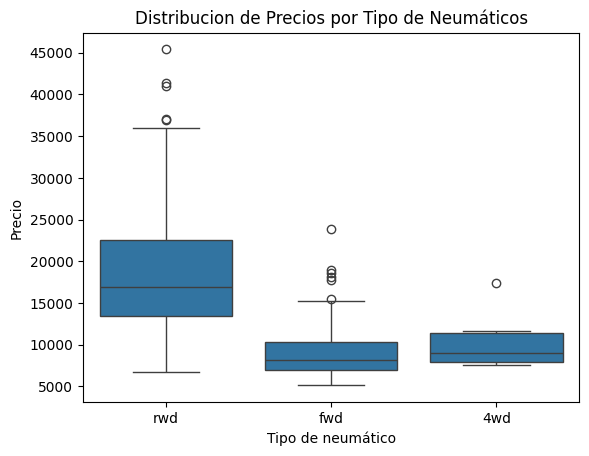

In [56]:
#Diagrama de cajas y bigotes en relacion al precio del auto y su tipo de ruedas
sns.boxplot(x='drive-wheels', y='price', data=autos)
plt.title("Distribucion de Precios por Tipo de Neumáticos")
plt.xlabel("Tipo de neumático")
plt.ylabel("Precio")

##Conclusiones (tipo de neumáticos)
Se aprecia como los autos con tracción trasera (RWD) son más costosos, teniendo un rango bastante amplio de precios, incluyendo algunos valores atípicos bastante elevados (de hasta 45,000 dólares). Después, los autos con tracción delantera (FWD) son los más económicos, con un concentrado de precios bastante bajo, teniendo algunos valores atípicos poco elevados a diferencias de los de tracción trasera. Los autos con tracción en las 4 ruedas (4WD) tienen precios un poco mas elevados que los autos con tracción delantera, teniendo un rango más reducido entre precios más asequibles.

##Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)

Text(0, 0.5, 'Precio')

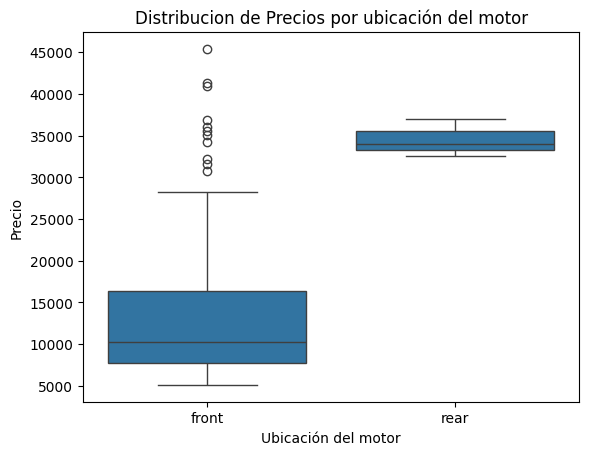

In [57]:
#Diagrama de cajas y bigotes en relacion al precio del auto y la ubicación del motor
sns.boxplot(x='engine-location', y='price', data=autos)
plt.title("Distribucion de Precios por ubicación del motor")
plt.xlabel("Ubicación del motor")
plt.ylabel("Precio")

##Conclusiones (Ubicación del motor)
Se observa como los automóviles con motor frontal son más a comparación de los autos con motor trasero, teniendo su mayor concentración de datos en un rango bajo de precios, aunque, teniendo algunos valores atípicos elevados, a diferencia de los de motor trasero que hay menos, donde sus precios superan los 30,000 dólares.

#Conclusiones generales de la práctica
Para concluir, puedo decir que este tipo de practicas son muy útiles e interesantes ya que muestran lo sencillo que es obtener distintos datos específicos de un archivo con grandes cantidades de datos, aunque para esta práctica utilizamos un factor en común (precios), se puede decir que dependiendo de las necesidades o de lo que se pida, se pueden obtener todo tipo de datos independientemente de si es un factor distinto o diferentes factores. La utilización de Histogramas facilita bastante la visualización de datos especificos y estadísticas basadas en los datos.